# Result Analysis

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### RQ1 - Constraint Adherence 

In [60]:
# Load LLM judge and manual results
deepeval_df = pd.read_excel('./tests/deepeval_tests/output/constraint_output_new.xlsx')
manual_df = pd.read_excel('./tests/manual_tests/output/constraints_output_new_with_rating.xlsx')

In [61]:
len(manual_df)

31

In [62]:
deepeval = deepeval_df.rename(columns={'scenario': 'scenario_id'})
manual = manual_df.rename(columns={'Score': 'manual_score'})
    
# Merge the results
merged_df = deepeval.merge(
    manual[['scenario_id', 'rating']],
    on='scenario_id',
    how='left',
)

In [63]:
merged_df.head()

,scenario_id,pantry,dietary_constraints,allergies,assistant_response,judge_explanation,llm_constraint_score,eval_passed,rating
0,1,"spinach, canned chickpeas, tomatoes, rice, lemon",vegetarian,peanut,"**Recipe Recommendations:**\n\nUnfortunately, ...","The recipe recommendation, **Spinach and Chick...",2,True,2
1,2,"rice, broccoli, tofu, tamari, ginger",gluten-free,shellfish,"Based on the ingredients in your pantry, here ...",The recipe recommendations provided (Broccoli ...,2,True,2
2,3,"tofu, spinach, tomatoes, bread, avocado",vegan,soy,"After searching our database, I found some del...",The recipe recommendation partially adheres to...,1,True,2
3,4,"ground beef, cheddar cheese, eggs, lettuce, so...",keto,egg,Based on the user's pantry and dietary prefere...,The recipe recommendations clearly violate the...,0,False,1
4,5,"bread, chicken, carrots, sunflower butter, jam",dairy-free,peanut,Based on the available ingredients in your pan...,The recipe recommendation does not contain any...,2,True,2


In [64]:
#merged_df.to_excel('merged_df.xlsx')
df = merged_df

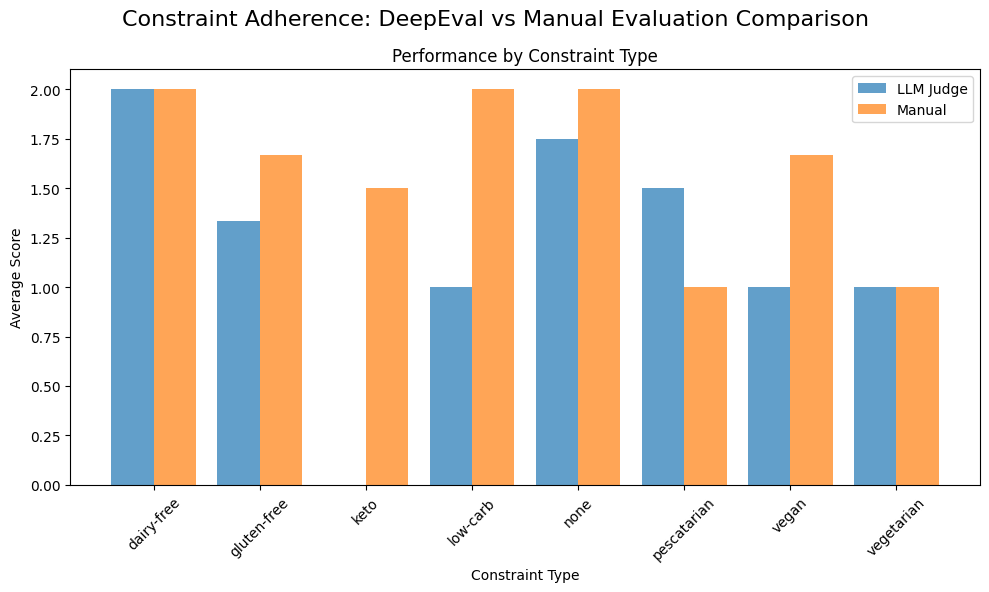

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Constraint Adherence: Deepeval vs Manual Evaluation Comparison', 
              fontsize=16) 


constraint_performance = df.groupby('dietary_constraints').agg({
    'llm_constraint_score': 'mean',
    'rating': 'mean'
})
    
x = np.arange(len(constraint_performance))
width = 0.4

ax.bar(x - width/2,constraint_performance['llm_constraint_score'],
       width,  label='LLM Judge', alpha=0.7)
ax.bar(x + width/2, constraint_performance['rating'], 
       width, label='Manual', alpha=0.7)

ax.set_xlabel('Constraint Type')
ax.set_ylabel('Average Score')
ax.set_title('Performance by Constraint Type')
ax.set_xticks(x)
ax.set_xticklabels(constraint_performance.index, rotation=45)
ax.legend()
    
plt.tight_layout()
plt.show()


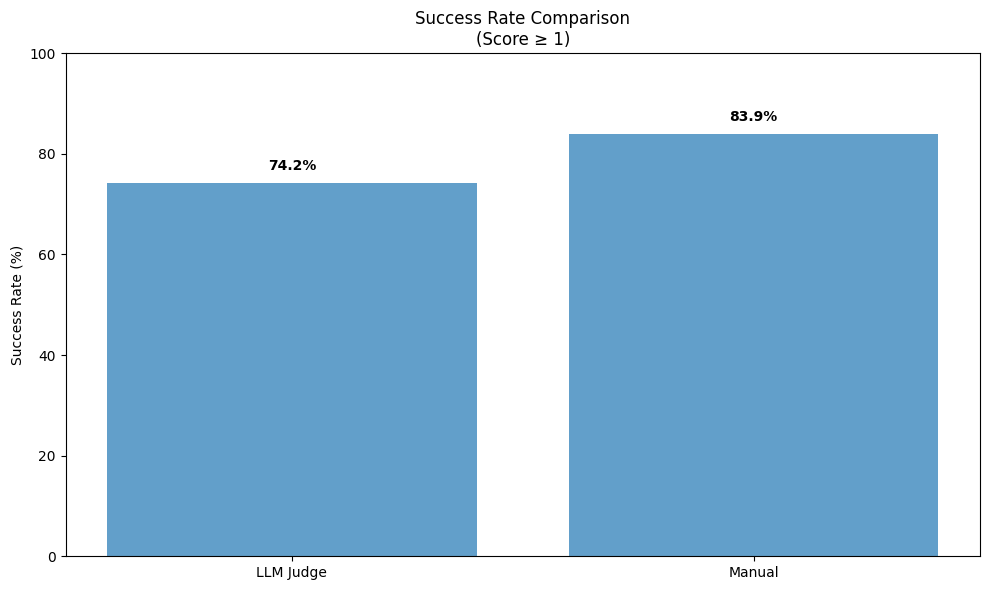

In [ ]:
# Success Rate Comparison
fig, ax = plt.subplots(figsize=(10, 6))

deepeval_success = df['eval_passed'].mean() * 100
manual_success = (df['rating'] >= 1).mean() * 100

success_rates = [deepeval_success, manual_success]
labels = ['LLM Judge', 'Manual']

bars = ax.bar(labels, success_rates, alpha=0.7)
ax.set_ylabel('Success Rate (%)')
ax.set_title('Success Rate Comparison\n(Score ≥ 1)')
ax.set_ylim(0, 100)

for bar, rate in zip(bars, success_rates):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# RQ2- Shelf Life prioritization

In [75]:
deepeval_df = pd.read_excel('./tests/deepeval_tests/output/shelf_life_output_new.xlsx')
manual_df = pd.read_excel('./tests/manual_tests/output/shelf_life_output_new.xlsx')
    
# Clean and merge data
manual_clean = manual_df.rename(columns={
    'Test Name': 'scenario_id',
    'Objective Score': 'manual_score',
    'Score Explanation': 'manual_explanation',
    'Top Recipe': 'top_recipe_manual'
})

In [76]:
# Merge datasets
merged_df = deepeval_df.merge(
    manual_clean[['scenario_id', 'manual_score', 'manual_explanation', 'top_recipe_manual']],
    on='scenario_id',
    how='left'
)

merged_df['urgent_usage_rate_new'] = merged_df['urgent_usage_rate'].str.rstrip('%').astype('float')



In [77]:
merged_df.head()

,scenario_id,pantry_ingredients,dietary_constraints,allergies,urgent_ingredients_found,recipes_recommended,urgent_ingredients_used,urgent_usage_rate,assistant_response,llm_shelf_life_score,shelf_life_explanation,eval_passed,manual_score,manual_explanation,top_recipe_manual,urgent_usage_rate_new
0,1,"spinach, canned chickpeas, tomatoes, rice, lemon",vegetarian,peanut,"spinach (5 days), tomatoes (6 days)","Fried Tomatoes, Chalupas, Mayonnaise",tomatoes,100.0%,"Based on the ingredients in your pantry, I rec...",1,The recommended recipes do contain some urgent...,True,1,No urgent ingredients,Fried Tomatoes,100.0
1,2,"rice, broccoli, tofu, tamari, ginger",gluten-free,shellfish,NaN,"Broccoli Rice Casserole, Broccoli Casserole, R...",NaN,0.0%,Here are the top matching recipes that use as ...,0,The recommended recipes do not contain any urg...,False,1,No urgent ingredients,Broccoli Rice Casserole,0.0
2,3,"tofu, spinach, tomatoes, bread, avocado",vegan,soy,"spinach (5 days), tomatoes (6 days), bread (4 ...","Open-Faced Cucumber Sandwiches, Uncle Tom'S Fr...","bread, tomatoes",100.0%,Here are the recipe recommendations that use a...,1,1. The recommended recipes do contain some urg...,True,1,No urgent ingredients,Open-Faced Cucumber Sandwiches,100.0
3,4,"ground beef, cheddar cheese, eggs, lettuce, so...",keto,egg,"eggs (3 days), lettuce (5 days)",Taco-Filled Green Pepper,NaN,0.0%,Based on the ingredients available in your pan...,1,The recommended recipes do not prioritize the ...,True,0,POOR: Uses 0/1 urgent ingredients,Taco-Filled Green Pepper,0.0
4,5,"bread, chicken, carrots, sunflower butter, jam",dairy-free,peanut,bread (4 days),"Open-Faced Cucumber Sandwiches, Uncle Tom'S Fr...",bread,300.0%,"Based on the ingredients in your pantry, I rec...",1,"1. Only one of the recommended recipes, **Open...",True,1,No urgent ingredients,Open-Faced Cucumber Sandwiches,300.0


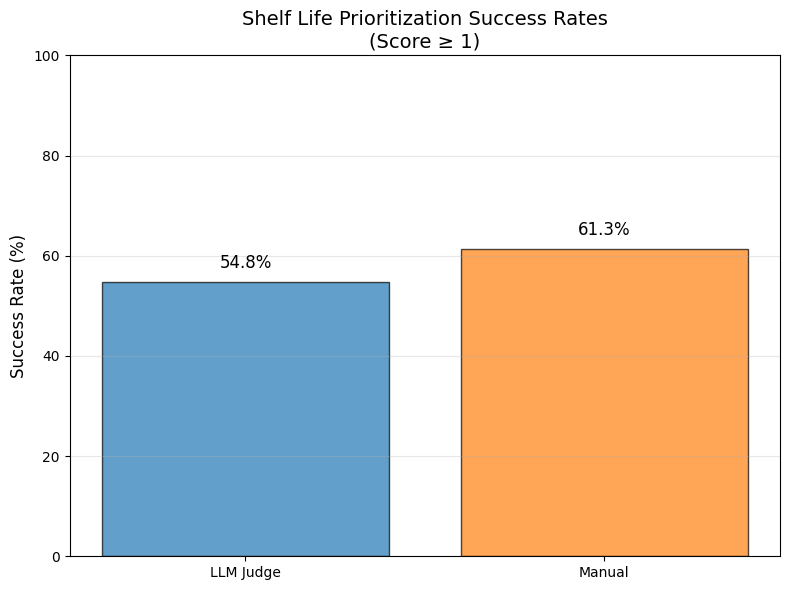

Success Rate Comparison:
  DeepEval: 54.8%
  Manual: 61.3%
  Difference: 6.5%


In [78]:
# Success Rate Comparison
if len(merged_df) > 0:
    fig, ax = plt.subplots(figsize=(8, 6))
    
    deepeval_success = merged_df['eval_passed'].mean() * 100
    manual_success = (merged_df['manual_score'] >= 1).mean() * 100
    
    success_rates = [deepeval_success, manual_success]
    labels = ['LLM Judge', 'Manual']
    colors = ['#1f77b4', '#ff7f0e']
    
    bars = ax.bar(labels, success_rates, color=colors, alpha=0.7, 
                  edgecolor='black', linewidth=1)
    
    ax.set_ylabel('Success Rate (%)', fontsize=12)
    ax.set_title('Shelf Life Prioritization Success Rates\n(Score ≥ 1)', 
                 fontsize=14)
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, rate in zip(bars, success_rates):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                f'{rate:.1f}%', ha='center', va='bottom', 
                fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Success Rate Comparison:")
    print(f"  DeepEval: {deepeval_success:.1f}%")
    print(f"  Manual: {manual_success:.1f}%")
    print(f"  Difference: {abs(deepeval_success - manual_success):.1f}%")

In [79]:
merged_df.head()

,scenario_id,pantry_ingredients,dietary_constraints,allergies,urgent_ingredients_found,recipes_recommended,urgent_ingredients_used,urgent_usage_rate,assistant_response,llm_shelf_life_score,shelf_life_explanation,eval_passed,manual_score,manual_explanation,top_recipe_manual,urgent_usage_rate_new
0,1,"spinach, canned chickpeas, tomatoes, rice, lemon",vegetarian,peanut,"spinach (5 days), tomatoes (6 days)","Fried Tomatoes, Chalupas, Mayonnaise",tomatoes,100.0%,"Based on the ingredients in your pantry, I rec...",1,The recommended recipes do contain some urgent...,True,1,No urgent ingredients,Fried Tomatoes,100.0
1,2,"rice, broccoli, tofu, tamari, ginger",gluten-free,shellfish,NaN,"Broccoli Rice Casserole, Broccoli Casserole, R...",NaN,0.0%,Here are the top matching recipes that use as ...,0,The recommended recipes do not contain any urg...,False,1,No urgent ingredients,Broccoli Rice Casserole,0.0
2,3,"tofu, spinach, tomatoes, bread, avocado",vegan,soy,"spinach (5 days), tomatoes (6 days), bread (4 ...","Open-Faced Cucumber Sandwiches, Uncle Tom'S Fr...","bread, tomatoes",100.0%,Here are the recipe recommendations that use a...,1,1. The recommended recipes do contain some urg...,True,1,No urgent ingredients,Open-Faced Cucumber Sandwiches,100.0
3,4,"ground beef, cheddar cheese, eggs, lettuce, so...",keto,egg,"eggs (3 days), lettuce (5 days)",Taco-Filled Green Pepper,NaN,0.0%,Based on the ingredients available in your pan...,1,The recommended recipes do not prioritize the ...,True,0,POOR: Uses 0/1 urgent ingredients,Taco-Filled Green Pepper,0.0
4,5,"bread, chicken, carrots, sunflower butter, jam",dairy-free,peanut,bread (4 days),"Open-Faced Cucumber Sandwiches, Uncle Tom'S Fr...",bread,300.0%,"Based on the ingredients in your pantry, I rec...",1,"1. Only one of the recommended recipes, **Open...",True,1,No urgent ingredients,Open-Faced Cucumber Sandwiches,300.0


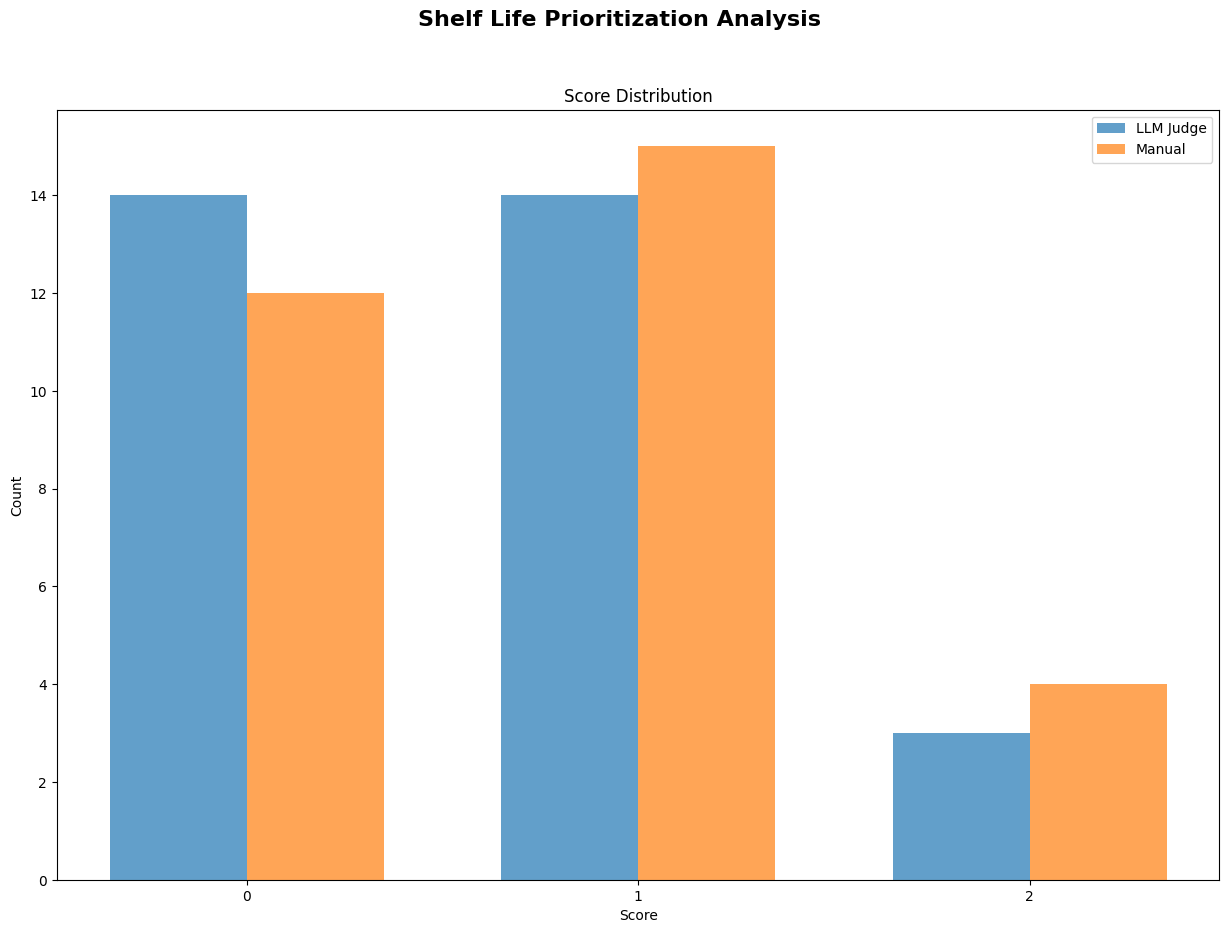

In [81]:
df_shelf = merged_df.copy()

import matplotlib.pyplot as plt

y_true = df_shelf['manual_score']
y_pred = df_shelf['llm_shelf_life_score']

fig, axes = plt.subplots(figsize=(15, 10))
fig.suptitle('Shelf Life Prioritization Analysis', fontsize=16, fontweight='bold')

# Score Distribution
score_counts_de = df_shelf['llm_shelf_life_score'].value_counts().sort_index()
score_counts_manual = df_shelf['manual_score'].value_counts().sort_index()
x = np.arange(len(score_counts_de))
width = 0.35
axes.bar(x - width/2, score_counts_de.values, width, label='LLM Judge', alpha=0.7)
axes.bar(x + width/2, score_counts_manual.values, width, label='Manual', alpha=0.7)
axes.set_xlabel('Score')
axes.set_ylabel('Count')
axes.set_title('Score Distribution')
axes.set_xticks(x)
axes.set_xticklabels(score_counts_de.index)
axes.legend()
